## Lab Exercise 1
### Exploratory Analysis of a Real-world application.

### Q1.1: Clean the dataset by handling missing values, removing duplicates, and filtering any irrelevant data.

In [2]:
import pandas as pd
data=pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
print(data.info())
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### As we can see the null values in CustomerID is almost 25% so we cannot drop them therefore, we will be assigning a common CustomerID say 12345 which will be representing the Wholesalers as they are the ones who don't have CustomerID. And coming to Description we will be dropping the null values as they are barely 0.2%

In [8]:
data['CustomerID'].fillna(value=12345,inplace=True)

In [13]:
data.dropna(inplace=True)
print(data.info())
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB
None


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
data.duplicated().sum()

5268

#### We can see that there are 5268 duplicates which is 1% of the data which we will be dropping.

In [18]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [38]:
len(data[data['Quantity']<0])

9725

#### We can see that there are 9725 records having negative quantities. We can interpret that as these are sales returns/buy backs.

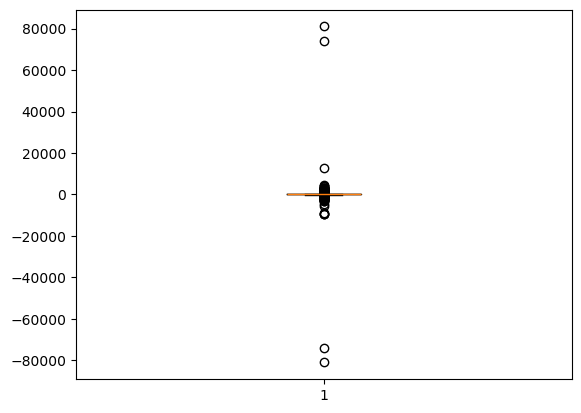

{'whiskers': [<matplotlib.lines.Line2D at 0x314225710>,
 'caps': [<matplotlib.lines.Line2D at 0x314226c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x314224c50>],
 'medians': [<matplotlib.lines.Line2D at 0x314226f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x314266010>],
 'means': []}

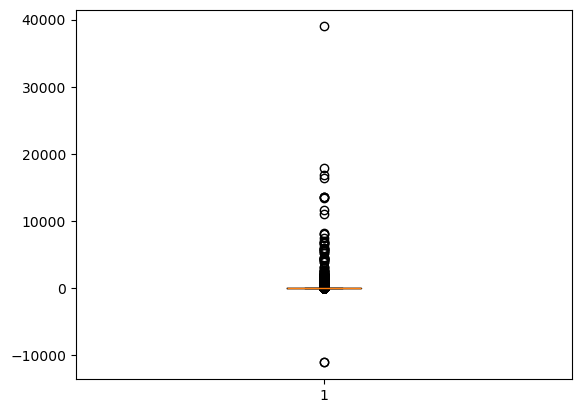

In [44]:
import matplotlib.pyplot as plt
plt.boxplot(data['Quantity'])
plt.show()
plt.boxplot(data['UnitPrice'])

#### We can see there are outliers in Quantity and Unit Prices, which we will be dropping.

In [47]:
import numpy as np
from scipy import stats
def drop_outlier(data,col_name):
  print(data.shape)
  z = np.abs(stats.zscore(col_name))
  data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
  print("New data shape post deletion: "+str(data.shape))
drop_outlier(data,data['Quantity'])
drop_outlier(data,data['UnitPrice'])

(535187, 8)
New data shape post deletion: (534688, 8)
(534688, 8)
New data shape post deletion: (534250, 8)


### Q1.2: Summarize the dataset by providing descriptive statistics (e.g., mean, median, standard deviation) for relevant columns like Quantity, UnitPrice, and InvoiceDate.

In [48]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,534250.000000,534250,534250.000000,534250.000000
mean,9.230604,2011-07-04 12:02:56.872250880,3.504360,14549.022828
min,-524.000000,2010-12-01 08:26:00,0.000000,12345.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,12352.000000
50%,3.000000,2011-07-19 15:55:00,2.080000,14364.000000
75%,10.000000,2011-10-19 09:00:00,4.130000,16243.000000
max,552.000000,2011-12-09 12:50:00,248.130000,18287.000000
std,23.956036,NaN,6.813925,1953.944034


#### From the above table it is evident that all the records are from 1 Dec 2010 to 9 Dec 2011. The average quantity per invoice is approx. 9 and max being 552. The maximum buyback or sale return is 524 untis. coming to Unit Price we can see that products range from 0-248 and mean being 3.5(all in dollars)

### Q2.1: What are the top 10 best-selling products by quantity?

<BarContainer object of 10 artists>

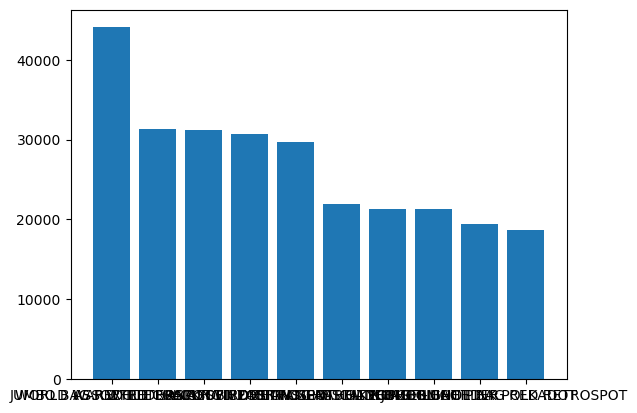

In [142]:
qty=data.groupby('Description')['Quantity'].sum().reset_index()
qty=qty.sort_values(by='Quantity',ascending=False)[:10]
plt.bar(qty.Description,qty.Quantity)

#### We can see the most sold product is WHITE HANGING HEART T-LIGHT HOLDER followed by REGENCY CAKESTAND 3 TIER.

### Q2.2: What is the total revenue generated by each product?

<Axes: xlabel='Description'>

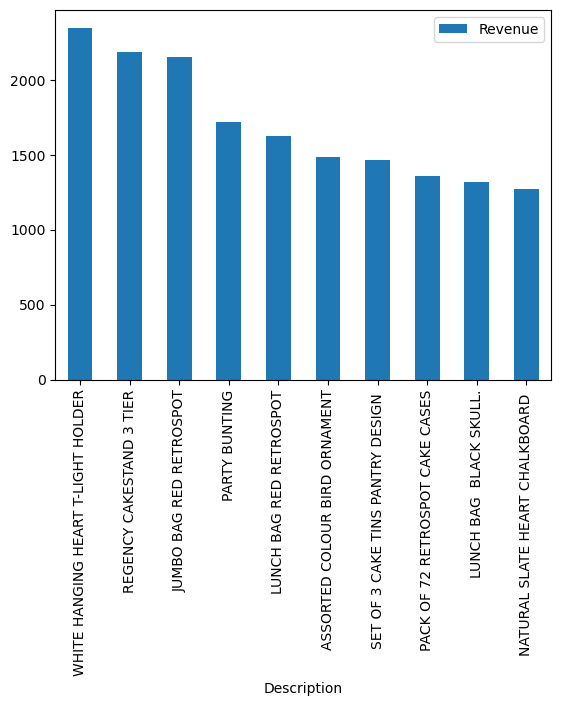

In [74]:
data['Revenue']=data['Quantity']*data['UnitPrice']
data[['Description','Revenue']].groupby('Description').count().sort_values(by='Revenue',ascending=False)[:10].plot(kind='bar')

#### We can see that the most selling products are also generating most revenues

### Q2.3: What is the monthly revenue trend? Are there noticeable patterns or peaks in sales over time?

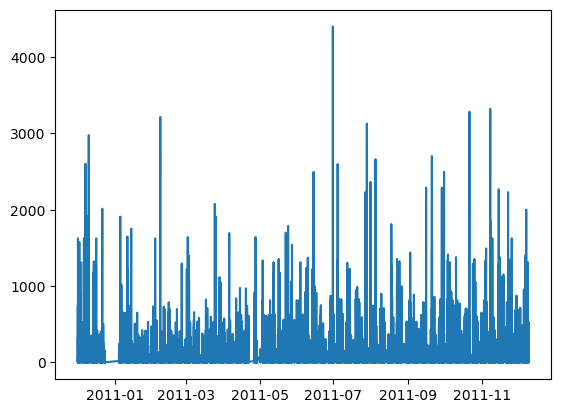

In [78]:
plt.plot(data[data['Revenue']>0]['InvoiceDate'],data[data['Revenue']>0]['Revenue'])

### Q3.1: How many unique customers are there in the dataset? What percentage of sales is driven by repeat customers?

In [91]:
print("Total Unique Customers: ",len(data['CustomerID'].unique()))

Total Unique Customers:  4354


In [109]:
data['RepeatCustomer']=data['CustomerID'].duplicated()
data[['RepeatCustomer','Revenue']].groupby('RepeatCustomer').count()

,Revenue
RepeatCustomer,
False,4354
True,529896


#### We can see that 99.99% revenue is driven by repeat customers

### Q3.2: What is the average order value (total sales per invoice)? How does this vary across different customer segments (e.g., country-wise)?

In [114]:
print("Avergae Order value: ",data['Revenue'].sum()/data.shape[0])

Avergae Order value:  17.827109806270474


In [119]:
customersegments=data[['Country','Revenue']].groupby('Country').count()
customersegments['ticketprice']=customersegments['Revenue']/data['']

,Revenue
Country,
Australia,1246
Austria,401
Bahrain,19
Belgium,2069
Brazil,32
Canada,150
Channel Islands,755
Cyprus,609
Czech Republic,30


In [121]:
data['Country'].value_counts()

Country
United Kingdom          488030
Germany                   9470
France                    8534
EIRE                      8169
Spain                     2526
Netherlands               2360
Belgium                   2069
Switzerland               1994
Portugal                  1498
Australia                 1246
Norway                    1081
Italy                      802
Channel Islands            755
Finland                    694
Cyprus                     609
Sweden                     450
Unspecified                442
Austria                    401
Denmark                    389
Japan                      345
Poland                     341
Israel                     294
USA                        291
Hong Kong                  278
Singapore                  219
Iceland                    182
Canada                     150
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
